# TUTORIAL: ¡PYTORCH DESDE CERO!

En este tutorial veremos paso a paso todos los elementos que usualmente hay que tener en cuenta para crear, entrenar, validar y poner a prueba prácticamente cualquier modelo de Deep Learning usando esta librería.


Contenido:

1. [Pre-requisitos](#scrollTo=WHDyLMetUr6e&line=9&uniqifier=1)
2. [El problema a resolver](#scrollTo=-tudGJu8WZaD)
3. [Los tensores](#scrollTo=0YbDrmdC_BQ3)
4. [Los *Datasets* y el set de datos](#scrollTo=UtWKq4Es_bYc)
5. [Cómo crear un modelo de *Deep Learning*](#scrollTo=w8lKSWreADfs&line=1&uniqifier=1)
6. [Propagación hacia adelante y hacia atrás](#scrollTo=gLUg0KZMAdru&line=11&uniqifier=1)
7. [Entrenando y validando un modelo: ejemplo completo](#scrollTo=HdQN4uq_Itu4&line=1&uniqifier=1)
8. [Generando predicciones con el modelo entrenado](#scrollTo=iTwsL-8OP6ys&line=12&uniqifier=1)

## 1. Pre-requisitos

Para entender cómo usar Pytorch es necesario entender algunos conceptos básicos. Por tanto sugiero revisar estos videos en el canal de YouTube:

- [¿Qué es una Red Neuronal?](https://youtu.be/53GUf747e38)
- [¿Qué son los parámetros e hiper-parámetros de un modelo?](https://youtu.be/3Iu5m166rnE)
- [¿Qué son los sets de entrenamiento, validación y prueba?](https://youtu.be/79K93XBOsIg)
- [¿Qué es el algoritmo del Gradiente Descendente?](https://youtu.be/IKloEocn3Hw)
- [¿Qué es la reproducibilidad en el Machine Learning?](https://youtu.be/tVD3PfYMk6g)
- [¿Qué es el algoritmo de *back propagation*?](https://www.codificandobits.com/curso/fundamentos-deep-learning-python/redes-neuronales-15-entrenamiento-forward-back-propagation/)

## 2. El problema a resolver

Supondremos un sencillo problema:

> Crear una Red Neuronal para clasificar imágenes de dígitos escritos a mano

![](https://drive.google.com/uc?export=view&id=1mckSBR3YFtRsblRcVfZ3--g4WR05_4sL)

Así:

- La entrada a la Red Neuronal serán imágenes en escala de gris, de tamaño 28x28, que contendrán un dígito (entre 0 y 9) escrito a mano
- La Red Neuronal tendrá que aprender a clasificar estas imágenes en una de 10 posibles categorías (de 0 a 9).
- Así que el dato predicho por la Red Neuronal será una cantidad numérica (entre 0 y 9) que debería coincidir con el dígito escrito en la imagen de entrada

Pero antes de implementar la Red debemos entender la forma como Pytorch procesa los datos.

Comencemos hablando de los Tensores.

## 3. Los tensores

> Un tensor es simplemente un **arreglo de datos**

Este arreglo puede ser un vector (1 dimensión), una matriz (2 dimensiones) o puede tener 3 o más dimensiones.

Los tensores son usados por Pytorch para almacenar **todos los datos usados por el modelo de Deep Learning** (datos de entrada, parámetros, datos de salida).

Comencemos creando de forma manual un simple Tensor con cantidades numéricas:



In [1]:
# Importar la librería
import torch

# Y crear un tensor de forma manual
arreglo = [[2,3,4], [1,5,6]] # Arreglo 2D de 2 filas x 3 columnas
tensor1 = torch.tensor(arreglo)
print(tensor1)

tensor([[2, 3, 4],
        [1, 5, 6]])


Una característica importante de los Tensores es que los podemos almacenar en la CPU (por defecto) o en la GPU (lo que permite aprovechar su velocidad de cómputo).

Por ejemplo, veamos en qué dispositivo (*device*) está almacenado el tensor que acabamos de crear:

In [2]:
tensor1.device

device(type='cpu')

Si ahora nos conectamos a la GPU de Google Colab podemos almacenar esta información en una variable:

In [3]:
# Detectar la GPU
device = (
    "cuda" if torch.cuda.is_available()
    else "cpu"
)
print(f"Usando {device}")

Usando cpu


Y podemos almacenar el tensor en la GPU usando el método "to":

In [4]:
tensor1 = tensor1.to(device)
print(tensor1.device)

cpu


Con esto, si realizamos cualquier operación con este tensor ésta será realizada sobre la GPU (sobre esto volveremos en unos momentos).

Y por ser un arreglo, un Tensor tiene atributos como por ejemplo su tamaño (`shape`):

In [5]:
tensor1.shape

torch.Size([2, 3])

Y podemos acceder al listado completo de atributos usando `tensor1.` + <kbd>⇥ Tab</kbd>:

In [ ]:
tensor1.

Usualmente no es necesario trabajar directamente con los tensores así que de momento es suficiente con que entendamos qué son y para qué se usan.

Veamos ahora los *Datasets* y el set de datos que usaremos en este tutorial.

## 4. Los *Datasets* y el set de datos

En Pytorch existen dos módulos que nos permiten cargar sets de datos:

- `torch.utils.data.Dataset`: nos permite cargar datasets que se encuentran en la base de datos de Pytorch
- `torch.utils.data.DataLoader`: nos permite cargar datasets propios así como **iterar** sobre un `Dataset`.

En este tutorial usaremos estos dos métodos:

1. Primero usaremos `torchvision.datasets` para cargar el set de datos de imágenes de caracteres
2. Más adelante usaremos `torch.utils.data.DataLoader` para iterar sobre el set de datos de imágenes y así entrenar y validar el modelo

Comencemos usando `torchvision.datasets` para cargar un set de datos pre-existente.

### 4.1. Descargar el set de datos

Usaremos el set de datos MNIST, el cual contiene un total de 60.000 imágenes cada una con un dígito (entre 0 y 9) escrito a mano. Además, por cada imagen se tiene su categoría correspondiente (una cantidad numérica entre 0 y 9).

Comencemos descargando este set de datos desde la base de datos de Pytorch:


In [6]:
# Importar librerías requeridas
from torchvision import datasets # Para descargar el dataset
from torchvision.transforms import ToTensor # Para convertir los datos a Tensores
import matplotlib.pyplot as plt # Para graficar las imágenes + categorías

# Crear el directorio "datos" y ejecutar el siguiente código:
data_mnist = datasets.MNIST(
    root = "datos", # Carpeta donde se almacenará
    train=True, # True: 60.000 imágenes, False: 10.000 imágenes
    download=True,
    transform=ToTensor() # Convertir imágenes a tensores
)

100%|██████████| 9912422/9912422 [00:00<00:00, 112833674.59it/s]


Extracting datos/MNIST/raw/train-images-idx3-ubyte.gz to datos/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 11691506.02it/s]


Extracting datos/MNIST/raw/train-labels-idx1-ubyte.gz to datos/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34033893.67it/s]


Extracting datos/MNIST/raw/t10k-images-idx3-ubyte.gz to datos/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10421514.64it/s]


Extracting datos/MNIST/raw/t10k-labels-idx1-ubyte.gz to datos/MNIST/raw



Al ejecutar la anterior celda se creará la carpeta "datos" en el disco remoto de Google Colab y allí se almacenará la totalidad del set de datos.

Veamos algunas características del set de datos que acabamos de descargar:

In [7]:
data_mnist

Dataset MNIST
    Number of datapoints: 60000
    Root location: datos
    Split: Train
    StandardTransform
Transform: ToTensor()

Vemos que tiene un total de 60.000 imágenes y que en últimas es una variable de tipo "Dataset".

Grafiquemos algunas imágenes de ejemplo para entender las características del set de datos:

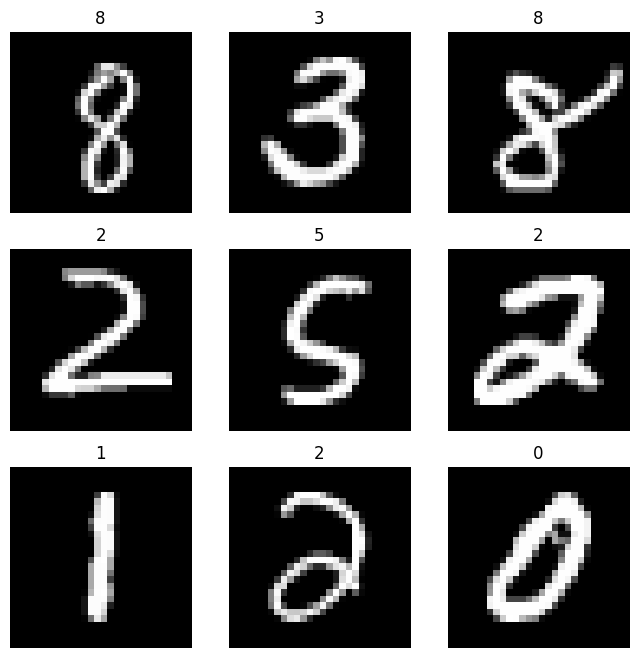

In [8]:
figure = plt.figure(figsize=(8, 8))
fils, cols = 3, 3

for i in range(1, cols * fils + 1):
    # Escoger una imagen aleatoria
    sample_idx = torch.randint(len(data_mnist), size=(1,)).item()

    # Extraer imagen y categoría
    img, label = data_mnist[sample_idx]

    # Dibujar
    figure.add_subplot(fils, cols, i)
    plt.title(str(label)) # Categoría
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray") # Imagen
plt.show()

Imprimamos en pantalla algunas características de una de estas imágenes y de su categoría:

In [9]:
# Características de una imagen
print(f'Tipo de dato imagen: {type(img)}')
print(f'Tamaño imagen: {img.shape}')
print(f'Mínimo y máximo imagen: {img.min()}, {img.max()}')
print(f'Tipo de dato categoría: {type(label)}')

Tipo de dato imagen: <class 'torch.Tensor'>
Tamaño imagen: torch.Size([1, 28, 28])
Mínimo y máximo imagen: 0.0, 1.0
Tipo de dato categoría: <class 'int'>


Cada imagen tiene estas características:

- Es un Tensor
- Tiene un tamaño de 1x28x28 (el 1 indica que es una imagen en escala de grises)
- Sus pixeles tienen valores entre 0 y 1

Por otra parte es importante tener en cuenta que la categoría está por defecto almacenada como un entero (*int*) y no como un tensor. Esto implica que más adelante **tendremos que convertir la categoría de cada imagen a un tensor para que pueda ser procesada por la Red Neuronal.**

### 4.2. Sets de entrenamiento, validación y prueba

Siempre que construimos un modelo de Deep Learning debemos realizar la partición del set de datos en entrenamiento, validación y prueba.

En este caso haremos la partición usando proporciones del 80, 10 y 10% respectivamente.

Esto lo podemos lograr fácilmente usando el método `random_split` de Pytorch.

Para ello, primero fijamos la semilla del generador de números aleatorio de Pytorch, lo que garantizará que cada vez que ejecutemos el código obtendremos las mismas particiones:

In [10]:
torch.manual_seed(123)

Y ahora sí usamos `random_split` para generar las particiones con las proporciones deseadas (80, 10 y 10%):

In [11]:
train, val, test = torch.utils.data.random_split(
    data_mnist, [0.8, 0.1, 0.1]
)

# Verificar tamaños
print(f'Tamaño set de entrenamiento: {len(train)}')
print(f'Tamaño set de validación: {len(val)}')
print(f'Tamaño set de prueba: {len(test)}')

# Y verificar el tipo de dato de train, val y test
print(f'Tipo de dato set "train": {type(train)}')
print(f'Tipo de dato set "val": {type(val)}')
print(f'Tipo de dato set "test": {type(test)}')

Tamaño set de entrenamiento: 48000
Tamaño set de validación: 6000
Tamaño set de prueba: 6000
Tipo de dato set "train": <class 'torch.utils.data.dataset.Subset'>
Tipo de dato set "val": <class 'torch.utils.data.dataset.Subset'>
Tipo de dato set "test": <class 'torch.utils.data.dataset.Subset'>


Y vemos que los tres subsets de datos son de tipo `dataset`.

Ya estamos listos para ver cómo crear el modelo (la Red Neuronal).

## 5. ¿Cómo crear un modelo de *Deep Learning*?

Crearemos una sencilla Red Neuronal con estas características:

- Capa de entrada: 28x28 = 784 elementos
- Capa oculta: 15 neuronas, activación ReLU
- Capa de salida: 10 neuronas (1 por cada categoría a predecir), activación *softmax*

![](https://drive.google.com/uc?export=view&id=1md-A_Qc1cbBKnWVTfUm4qv2egv1bwX_o)

Adicionalmente, antes de llevar cada imagen a la Red tendremos que **aplanarla** para convertirla de un tensor 3D de 1x28x28 a un tensor de 1D de 28x28 = 784 (el mismo tamaño de la capa de entrada de la Red):

![](https://drive.google.com/uc?export=view&id=1md2CPT14WYV2K6bJppamDsi_-6pUpLxH)

Para crear la Red Neuronal debemos **crear una sub-clase de `nn.Module`**. Veamos cómo hacerlo:

In [12]:
# Importar módulo nn
from torch import nn

# Crear la Red Neuronal como una subclase de nn.Module
# Siempre se añaden dos métodos a esta subclase
# 1. Método "init": define la arquitectura de la red
# 2. Método "forward": define cómo será generada cada predicción

class RedNeuronal(nn.Module):
    # 1. Método "init"
    def __init__(self):
        super().__init__()

        # Y agregar secuencialmente las capas
        self.aplanar = nn.Flatten() # Aplanar imágenes de entrada
        self.red = nn.Sequential(
            nn.Linear(28*28, 15), # Capa de entrada + capa oculta
            nn.ReLU(), # Función de activación capa oculta
            nn.Linear(15,10), # Capa de salida SIN activación
        )

    # 2. Método "forward" (x = dato de entrada)
    def forward(self, x):
        # Definir secuencialmente las operaciones a aplicar
        x = self.aplanar(x) # Aplanar dato
        logits = self.red(x) # Generar predicción

        return logits


> Nota: a pesar de que la capa de salida debería tener una activación *softmax* esta no se incluye porque no es necesaria para el entrenamiento (sólo es necesaria para garantizar que las salidas de cada neurona de salida suman exactamente 1).

Habiendo creado la clase ya podemos crear la Red Neuronal simplemente:

1. Creando una instancia de la clase `RedNeuronal`
2. Y moviendo esta instancia a la GPU

In [13]:
modelo = RedNeuronal().to(device)
print(modelo)

RedNeuronal(
  (aplanar): Flatten(start_dim=1, end_dim=-1)
  (red): Sequential(
    (0): Linear(in_features=784, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=10, bias=True)
  )
)


Podemos usar el método `parameters()` para imprimir en pantalla el número de parámetros a entrenar en este modelo:

In [14]:
total_params = sum(p.numel() for p in modelo.parameters())
print("Número de parámetros a entrenar: ", total_params)

Número de parámetros a entrenar:  11935


## 6. Propagación hacia adelante y hacia atrás

La propagación hacia adelante y hacia atrás son las dos fases clave al momento de entrenar la Red Neuronal.

Veamos cada fase en detalle:

### 6.1. Propagación hacia adelante (*forward propagation*)

Con la propagación hacia adelante se toma el dato de entrada ($X$), la Red lo procesa y genera una predicción ($y_{pred}$ ):

![](https://drive.google.com/uc?export=view&id=1meBLFk2SO5uOhWms2pQ4QdzWgGgOaT8q)

Veamos cómo realizar la propagación hacia adelante:

In [15]:
# Extraer una imagen y su categoría del set de entrenamiento
img, lbl = train[200]

print(type(img))
print(type(lbl))

<class 'torch.Tensor'>
<class 'int'>


Vemos que la imagen es un Tensor mientras que la categoría es un entero. Debemos convertir esta categoría a un tensor para poder presentarla al modelo:

In [16]:
# Convertir "lbl" a Tensor usando "tensor", definir tamaño igual a 1 (1 dato)
# con "reshape"
lbl = torch.tensor(lbl).reshape(1)
print(type(lbl))

<class 'torch.Tensor'>


Ahora llevamos tanto el dato como su categoría a la GPU:

In [17]:
img, lbl = img.to(device), lbl.to(device)

Y ahora sí propagamos el dato hacia adelante:

In [18]:
logits = modelo(img)
print(logits)

tensor([[ 0.1762, -0.0300,  0.1198, -0.0336, -0.0994,  0.0021, -0.1259,  0.0016,
          0.0412,  0.1990]], grad_fn=<AddmmBackward0>)


La predicción (o *logits*) es un arreglo **no normalizado** de 10 valores numéricos (puesto que tenemos 10 categorías).

No normalizado implica que su suma no es igual a 1. Para normalizarlo se puede usar la función *softmax* aunque no es necesario, podemos calcular la categoría predicha simplemente encontrando la posición donde se encuentre el valor máximo:

Logits: tensor([[ 0.1762, -0.0300,  0.1198, -0.0336, -0.0994,  0.0021, -0.1259,  0.0016,
          0.0412,  0.1990]], grad_fn=<AddmmBackward0>)
Categoría predicha: 9
Categoría real: 6


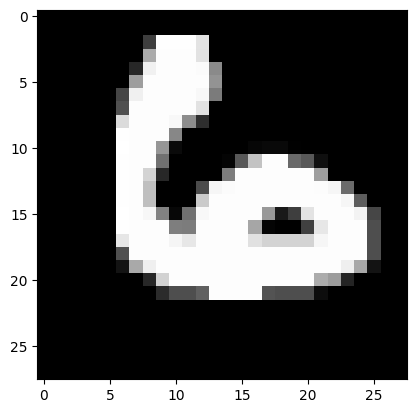

In [19]:
# Categoría predicha
y_pred = logits.argmax(1)

# Mostremos la imagen original
plt.imshow(img.cpu().squeeze(), cmap="gray");

# Y comparemos la categoría predicha con la categoría real
print(f'Logits: {logits}')
print(f'Categoría predicha: {y_pred[0]}')
print(f'Categoría real: {lbl[0]}')

¡Es de esperar que la categoría predicha (0) no coincida con la categoría real (6) puesto que no hemos entrenado la Red Neuronal!

Veamos ahora la segunda fase que hace parte del entrenamiento: la propagación hacia atrás.

### 6.2. Propagación hacia atrás (*backward propagation* o *backprop*)

Esta propagación hacia atrás permite **actualizar los parámetros del modelo con base en el gradiente de la pérdida**.

La idea básica es **ajustar estos parámetros para minimizar la pérdida** (mejorando así las predicciones).

Los pasos involucrados en esta propagación hacia atrás son:

0. Definir la **pérdida** (función que se usará para comparar las predicciones con las categorías reales) y el **optimizador** (algoritmo que se usará para ajustar los parámetros y minimizar la pérdida)
1. Tomar cada predicción (*logits*), compararla con la categoría real correspondiente ($y$) y calcular la **pérdida** ($loss$)
2. Calcular los **gradientes** de la pérdida (derivadas con respecto a cada parámetro)
3. Actualizar los parámetros del modelo usando los gradientes y un algoritmo de optimización (como por ejemplo el Gradiente Descendente):

![](https://drive.google.com/uc?export=view&id=1meRc9wEIKcSzj2X3lR7DgTgoIs5ixqHJ)

Veamos cómo implementar cada uno de estos pasos.

Comencemos definiendo la función de pérdida (entropía cruzada) y el optimizador a usar (Gradiente Descendente). En este último caso usaremos una tasa de aprendizaje de 0.2:

In [21]:
# 0. Pérdida y optimizador
fn_perdida = nn.CrossEntropyLoss()
optimizador = torch.optim.SGD(modelo.parameters(), lr=0.2) # se ponen acá los parámetros para que se actualícen

Vemos que al definir el optimizador el primer argumento son los parámetros del modelo (`modelo.parameters()`).

Esto permite "conectar" el modelo al optimizador de tal manera que durante el entrenamiento el optimizador pueda ajustar los parámetros para mejorar las predicciones.

Ahora tomamos la predicción (que se obtuvo con la propagación hacia adelante), la comparamos con la categoría real y calculamos la pérdida. La


Esto se hace con una sola línea de código:

In [22]:
# 1. Calcular pérdida
loss = fn_perdida(logits, lbl)
print(loss)

tensor(2.4591, grad_fn=<NllLossBackward0>)


Ahora calculamos los gradientes de la pérdida. Esto logra usando el método `backward()` asociado a la variable `loss`:


In [ ]:
# 2. Calcular los gradientes de la pérdida
loss.backward()

Y finalmente actualizamos los parámetros del modelo usando el optimizador.

Esto se logra en dos pasos:

1. Usando el método `step()` que actualiza los parámetros del modelo
2. Usando el método `zero_grad()` para explícitamente borrar los gradientes calculados anteriormente (pues Pytorch los deja almacenados y esto afecta el entrenamiento).

Estos dos pasos los podemos implementar en dos líneas de código:

In [23]:
# 3. Actualizar los parámetros del modelo
optimizador.step()
optimizador.zero_grad()

Y listo, ya tenemos la propagación hacia atrás.

Así que para resumir, re-escribamos todas las líneas de código anteriores para combinar en un sólo bloque la propagación hacia adelante y hacia atrás:

In [ ]:
# img: dato, lbl: categoría real

# Propagación hacia adelante (generar predicciones)
logits = modelo(img)

# Propagación hacia atrás
loss = fn_perdida(logits, lbl) # Perdida
loss.backward() # Calcular gradientes
optimizador.step() # Actualizar parámetros del modelo
optimizador.zero_grad() # Borrar gradientes calculados anteriormente

Y listo, tenemos en muy pocas líneas de código los dos pasos esenciales en el entrenamiento de cualquier modelo de Deep Learning: *forward* + *back* *propagation*.

Al entrenar el modelo no usaremos una sola imagen sino que usaremos todo el set de entrenamiento. Y además repetiremos la anterior celda de código varias veces (el número de iteraciones de entrenamiento que definamos).

Así que con todo lo visto hasta este punto ya estamos listos para conectar todos estos elementos y ver cómo se crea, entrena y valida nuestra Red Neuronal para clasificar imágenes.

## 7. Entrenando y validando un modelo: ejemplo completo

En esta última parte simplemente tomaremos las porciones de código de las secciones anteriores y las organizaremos para entender la lógica de creación, entrenamiento y validación de la Red Neuronal.

Veamos todo esto en detalle.

### 7.1. Creación de la Red Neuronal

Escribamos en una sola celda el código necesario para crear la clase y la instancia correspondiente a nuestro modelo:

In [24]:
# Clase
class RedNeuronal(nn.Module):
    # 1. Método "init"
    def __init__(self):
        super().__init__()

        # Y agregar secuencialmente las capas
        self.aplanar = nn.Flatten() # Aplanar imágenes de entrada
        self.red = nn.Sequential(
            nn.Linear(28*28, 15), # Capa de entrada + capa oculta
            nn.ReLU(), # Función de activación capa oculta
            nn.Linear(15,10), # Capa de salida SIN activación
        )

    # 2. Método "forward" (x = dato de entrada)
    def forward(self, x):
        # Definir secuencialmente las operaciones a aplicar
        x = self.aplanar(x) # Aplanar dato
        logits = self.red(x) # Generar predicción

        return logits

# Instancia (llevada a la GPU)
modelo = RedNeuronal().to(device)

Antes de entrenar la Red (usando el código para la propagación hacia adelante y hacia atrás), debemos preparar nuestros set de entrenamiento y validación. Veamos cómo hacer esto.

### 7.2. Preparar los sets de entrenamiento y validación

El set de entrenamiento nos permitirá usar la propagación hacia adelante y hacia atrás para automáticamente actualizar los parámetros del modelo.

Por su parte el set de validación se usará para que tras cada iteración de entrenamiento, pongamos a prueba el modelo y verifiquemos su desempeño.

Como tenemos muchos datos de entrenamiento (48.000) y muchos de validación (6.000) no podemos presentarlos en bloque al modelo pues habría problemas con la memoria RAM.

En lugar de ello los presentamos **por lotes** (*batches*), es decir pequeños grupos de datos.

Para poder crear estos lotes y presentarlos al modelo usamos `DataLoader`el segundo módulo de procesamiento de datos que posee Pytorch:

In [25]:
from torch.utils.data import DataLoader

# Definir el tamaño del lote
TAM_LOTE = 1000 # batch size

# Crear los "dataloaders" para los sets de entrenamiento y validación
train_loader = DataLoader(
    dataset=train,
    batch_size=TAM_LOTE,
    shuffle=True # Mezclar los datos aleatoriamente al crear cada lote
)

val_loader = DataLoader(
    dataset=val,
    batch_size=TAM_LOTE,
    shuffle=False
)

Cuando entrenemos y validemos el modelo le presentaremos, en cada iteración, las variables `train_loader` y `val_loader` para que se realice el entrenamiento y la validación.

Así que ya tenemos todo listo para realizar este entrenamiento y validación de la red. Veamos el código.

### 7.3. Entrenamiento y validación del modelo

Comencemos definiendo los hiper-parámetros: la tasa de aprendizaje del algoritmo de optimización y el número de iteraciones de entrenamiento:

In [26]:
# Hiperparámetros
TASA_APRENDIZAJE = 0.1 # learning rate (0.1)
EPOCHS = 10 # Número de iteraciones de entrenamiento

Ahora definimos la función de pérdida (*entropía cruzada*) y el optimizador (Gradiente Descendente). Este optimizador tendrá la tasa de aprendizaje definida en la celda anterior:

In [27]:
# Función de pérdida y optimizador
fn_perdida = nn.CrossEntropyLoss()
optimizador = torch.optim.SGD(modelo.parameters(), lr=TASA_APRENDIZAJE)

Ahora crearemos la función `train_loop` que se ejecutará en cada iteración del entrenamiento.

Esta función usa las dos fases vistas anteriormente: propagación hacia adelante y hacia atrás.

Además, en cada iteración calcularemos dos variables que nos permitirán monitorear el progreso del entrenamiento:

- `perdida_train`: valores promedio de la función de pérdida en cada iteración
- `exactitud`: valores promedio (en cada iteración) de la exactitud del modelo al momento de clasificar los datos. La exactitud es simplemente el porcentaje de datos clasificados correctamente con respecto al total de datos clasificados.

Veamos cómo implementar esta función:

In [28]:
def train_loop(dataloader, model, loss_fn, optimizer):
    # Cantidad de datos de entrenamiento y cantidad de lotes
    train_size = len(dataloader.dataset)
    nlotes = len(dataloader)

    # Indicarle a Pytorch que entrenaremos el modelo
    model.train()

    # Inicializar acumuladores pérdida y exactitud
    perdida_train, exactitud = 0, 0

    # Presentar los datos al modelo por lotes (de tamaño TAM_LOTE)
    for nlote, (X, y) in enumerate(dataloader):
        # Mover "X" y "y" a la GPU
        X, y = X.to(device), y.to(device)

        # Forward propagation
        logits = model(X)

        # Backpropagation
        loss = loss_fn(logits, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Acumular valores de pérdida y exactitud
        # perdida_train <- perdida_train + perdida_actual
        # exactitud <- exactitud + numero_aciertos_actuales
        perdida_train += loss.item()
        exactitud += (logits.argmax(1)==y).type(torch.float).sum().item()

        # Imprimir en pantalla la evolución del entrenamiento (cada 10 lotes)
        if nlote % 10 == 0:
            # Obtener el valor de la pérdida (loss) y el número de datos procesados (ndatos)
            ndatos = nlote*TAM_LOTE

            # E imprimir en pantalla
            print(f"\tPérdida: {loss.item():>7f}  [{ndatos:>5d}/{train_size:>5d}]")

    # Al terminar de presentar todos los datos al modelo, promediar pérdida y exactitud
    perdida_train /= nlotes # Pérdida promedio = pérdida acumulada / número de lotes
    exactitud /= train_size # Exactitud promedio = exactitud acumulada / número de datos

    # E imprimir información
    print(f'\tExactitud/pérdida promedio:')
    print(f'\t\tEntrenamiento: {(100*exactitud):>0.1f}% / {perdida_train:>8f}')

Muy bien, ya tenemos la función `train_loop` que permite ejecutar una iteración de entrenamiento del modelo. En un momento la usaremos.

La idea es que en cada iteración, además de entrenar el modelo, lo validemos. La validación consiste simplemente en:

1. Tomar el modelo entrenado y generar predicciones **con el set de validación**
2. Con las predicciones generadas en (1) calcular la pérdida y la exactitud del modelo

Para lograr esto crearemos una segunda función que llamaremos `val_loop`. Esta función es similar a la anterior con las siguientes diferencias:

- No presentaremos a la entrada de esta función el optimizador, pues no realizaremos entrenamiento
- No ejecutaremos propagación hacia atrás, pues no realizaremos entrenamiento
- Sólo realizaremos la propagación hacia adelante para generar las predicciones

En este último caso usamos `no_grad()` para indicarle de forma explícita a Pytorch que NO calcularemos gradientes (puesto que no estamos entrenando el modelo). Esto simplifica los cálculos y agiliza la ejecución del código de validación.

Veamos entonces cómo implementar `val_loop`:

In [29]:
def val_loop(dataloader, model, loss_fn):
    # Cantidad de datos de validación y cantidad de lotes
    val_size = len(dataloader.dataset)
    nlotes = len(dataloader)

    # Indicarle a Pytorch que validaremos el modelo
    model.eval()

    # Inicializar acumuladores pérdida y exactitud
    perdida_val, exactitud = 0, 0

    # Evaluar (generar predicciones) usando "no_grad"
    with torch.no_grad():
        for X, y in dataloader:
            # Mover "X" y "y" a la GPU
            X, y = X.to(device), y.to(device)

            # Propagación hacia adelante (predicciones)
            logits = model(X)

            # Acumular valores de pérdida y exactitud
            perdida_val += loss_fn(logits, y).item()
            exactitud += (logits.argmax(1) == y).type(torch.float).sum().item()

    # Tras generar las predicciones calcular promedios de pérdida y exactitud
    perdida_val /= nlotes
    exactitud /= val_size

    # E imprimir en pantalla
    print(f"\t\tValidación: {(100*exactitud):>0.1f}% / {perdida_val:>8f} \n")

¡Y listo! Ya tenemos todo lo necesario para entrenar y validar nuestro modelo de Deep Learning.

Sólo nos restan unas cuantas líneas de código en las cuales de forma iterativa llamaremos las dos funciones que acabamos de crear (`train_loop` y `val_loop`):

In [30]:
for t in range(EPOCHS):
    print(f"Iteración {t+1}/{EPOCHS}\n-------------------------------")
    # Entrenar
    train_loop(train_loader, modelo, fn_perdida, optimizador)
    # Validar
    val_loop(val_loader, modelo, fn_perdida)
print("Listo, el modelo ha sido entrenado!")

Iteración 1/10
-------------------------------
	Pérdida: 2.306079  [    0/48000]
	Pérdida: 2.152023  [10000/48000]
	Pérdida: 1.934167  [20000/48000]
	Pérdida: 1.698753  [30000/48000]
	Pérdida: 1.459207  [40000/48000]
	Exactitud/pérdida promedio:
		Entrenamiento: 55.3% / 1.835414
		Validación: 71.7% / 1.283330 

Iteración 2/10
-------------------------------
	Pérdida: 1.239127  [    0/48000]
	Pérdida: 1.107620  [10000/48000]
	Pérdida: 0.918477  [20000/48000]
	Pérdida: 0.834119  [30000/48000]
	Pérdida: 0.806360  [40000/48000]
	Exactitud/pérdida promedio:
		Entrenamiento: 77.3% / 0.934018
		Validación: 80.6% / 0.722597 

Iteración 3/10
-------------------------------
	Pérdida: 0.747941  [    0/48000]
	Pérdida: 0.619071  [10000/48000]
	Pérdida: 0.619623  [20000/48000]
	Pérdida: 0.557980  [30000/48000]
	Pérdida: 0.580324  [40000/48000]
	Exactitud/pérdida promedio:
		Entrenamiento: 84.8% / 0.605026
		Validación: 85.9% / 0.546174 

Iteración 4/10
-------------------------------
	Pérdida: 0.56

¡Perfecto! En este punto ya hemos entrenado y validado nuestro modelo.

Podemos ver que en la iteración 10 se tiene una exactitud de casi el 90% con ambos sets (entrenamiento y validación). Así que podemos decir que nuestro modelo esta generando buenas predicciones y que no tiene *overfitting*.

Sólo nos resta tomar el modelo entrenado y generar predicciones. Veamos cómo hacerlo.

## 8. Generando predicciones con el modelo entrenado

Habiendo entrenado el modelo ya podemos comenzar a usarlo para generar predicciones.

Estas predicciones implican que debemos introducir una imagen y el modelo debe predecir la categoría a la que pertenece.

Para ello crearemos una sencilla función (`predecir`) con estas características:

- Entradas: el modelo entrenado y una imagen
- Salida: mostrará en pantalla la imagen original y la categoría predicha

Veamos cómo crear esta función:

In [31]:
def predecir(model, img):
    # Generar predicción
    logits = model(img)
    y_pred = logits.argmax(1).item()

    # Mostrar imagen original y categoría predicha
    plt.imshow(img.cpu().squeeze(), cmap="gray")
    plt.title(f'Categoría predicha: {y_pred}');

Y pongamos a prueba esta función. Acá la idea es usar imágenes que nunca haya "visto" el modelo, es decir por ejemplo imágenes del set de prueba:

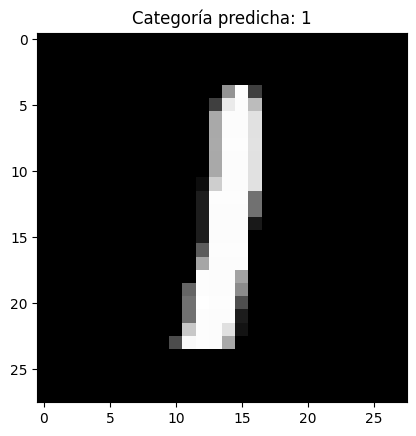

In [35]:
# Tomar una imagen del set de prueba
img, lbl = test[1235]

# Y generar la predicción
predecir(modelo, img)